In [43]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df= pd.read_csv("Diamonds Prices2022.csv", index_col=0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


## Data Cleaning

In [45]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Thus our data does not have any missing values

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53943 entries, 1 to 53943
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


This shows our data is already in the required data types thus we can proceed with the EDA part

In [47]:
#lets look at some basic statistics
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Exploratory Data Analysis

* lets see how the numeric data is distributed 

In [48]:
numeric_Df= df[['carat','depth', 'table', 'price', 'x', 'y','z']]
numeric_Df.head()

,carat,depth,table,price,x,y,z
1,0.23,61.5,55.0,326,3.95,3.98,2.43
2,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.23,56.9,65.0,327,4.05,4.07,2.31
4,0.29,62.4,58.0,334,4.20,4.23,2.63
5,0.31,63.3,58.0,335,4.34,4.35,2.75


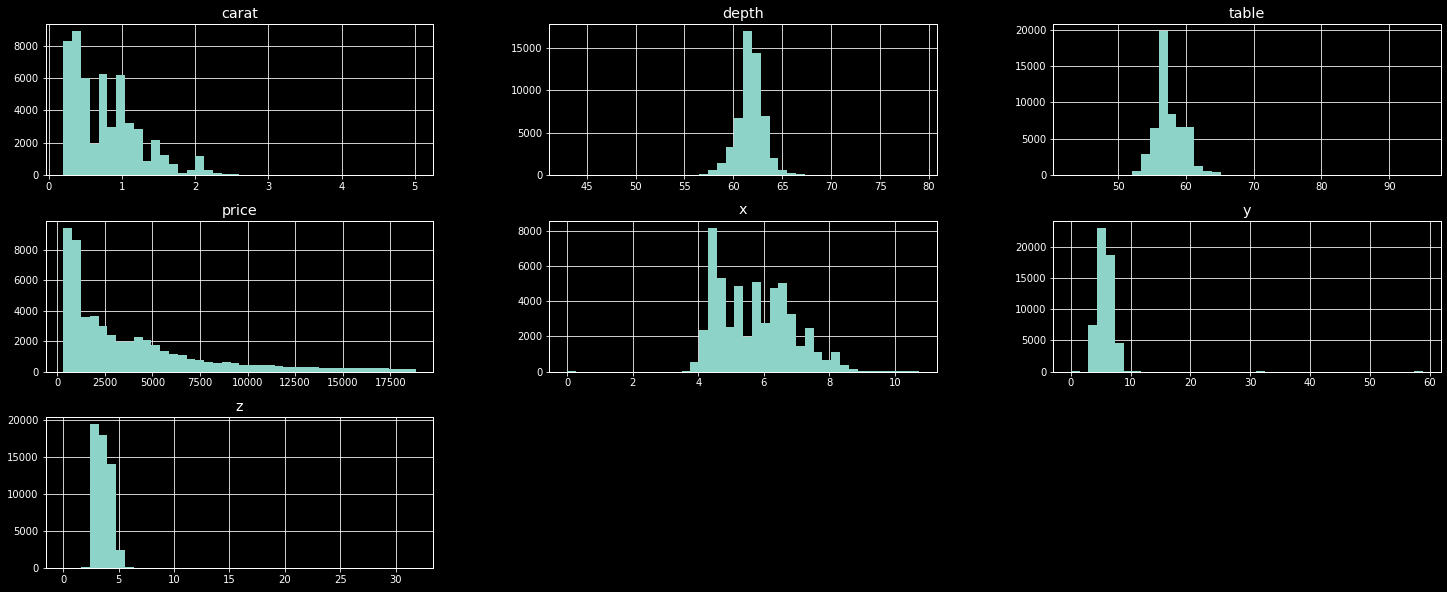

In [49]:
# plotting the distribution plot
plt.style.use('dark_background')
numeric_Df.hist(figsize=(25,10), bins=40)
plt.show()

* plotting the outliers in the numeric data

<AxesSubplot:ylabel='z'>

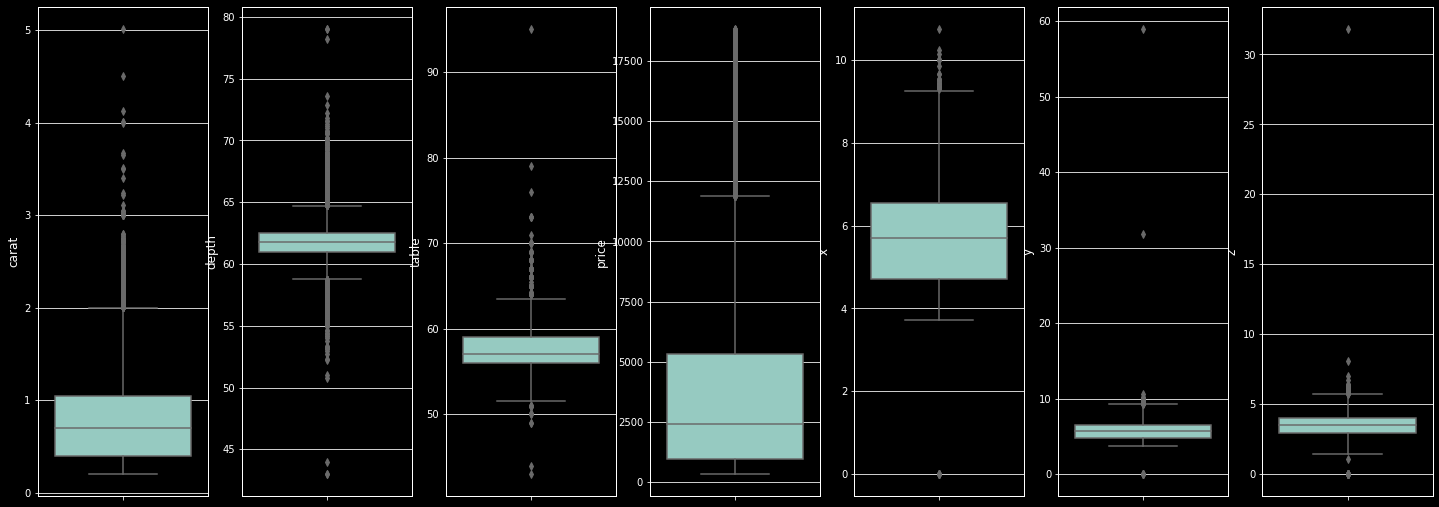

In [50]:
plt.figure(figsize=(25,9))

plt.subplot(1,7,1)
sns.boxplot(y=numeric_Df['carat'])

plt.subplot(1,7,2)
sns.boxplot(y=numeric_Df['depth'])

plt.subplot(1,7,3)
sns.boxplot(y=numeric_Df['table'])

plt.subplot(1,7,4)
sns.boxplot(y=numeric_Df['price'])

plt.subplot(1,7,5)
sns.boxplot(y=numeric_Df['x'])

plt.subplot(1,7,6)
sns.boxplot(y=numeric_Df['y'])

plt.subplot(1,7,7)
sns.boxplot(y=numeric_Df['z'])

we can see we almost have outliers in all the numeric columns, will handle them when we will train our regression model, with the help of standardization 

### Plotting the Categorical Histplots to know how many diamonds belongs to specific categories (cut, color, and clarity)

Text(0, 0.5, 'count')

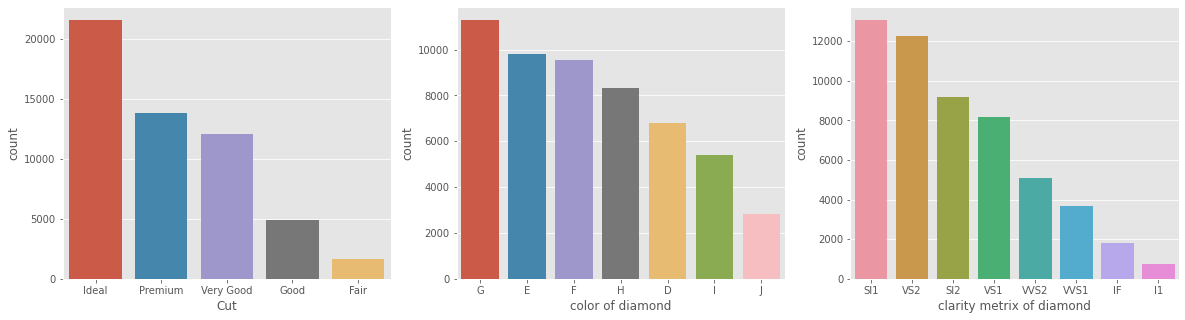

In [51]:
plt.style.use('ggplot')
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(x=df['cut'].value_counts().index, y=df['cut'].value_counts().values)
plt.xlabel('Cut')
plt.ylabel('count')

plt.subplot(1,3,2)
sns.barplot(x=df['color'].value_counts().index, y=df['color'].value_counts().values)
plt.xlabel('color of diamond')
plt.ylabel('count')

plt.subplot(1,3,3)
sns.barplot(x=df['clarity'].value_counts().index, y=df['clarity'].value_counts().values)
plt.xlabel('clarity metrix of diamond')
plt.ylabel('count')


lets have a look at the correlations between different metrics of the dataset, thus later we have an idea of how things are related to each other

In [52]:
numeric_Df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028234,0.181602,0.921591,0.975093,0.951721,0.953387
depth,0.028234,1.000000,-0.295798,-0.010630,-0.025289,-0.029340,0.094927
table,0.181602,-0.295798,1.000000,0.127118,0.195333,0.183750,0.150915
price,0.921591,-0.010630,0.127118,1.000000,0.884433,0.865419,0.861249
x,0.975093,-0.025289,0.195333,0.884433,1.000000,0.974701,0.970771
y,0.951721,-0.029340,0.183750,0.865419,0.974701,1.000000,0.952005
z,0.953387,0.094927,0.150915,0.861249,0.970771,0.952005,1.000000


looking above we can see that all the diagonal elements are 1, because correlation with self is always 1. Furthermore, we ca see some of features are positively correlated and some of them are inversely correlated. This will also help us later in feature selection and reduction of overfitting while traing the model

<AxesSubplot:>

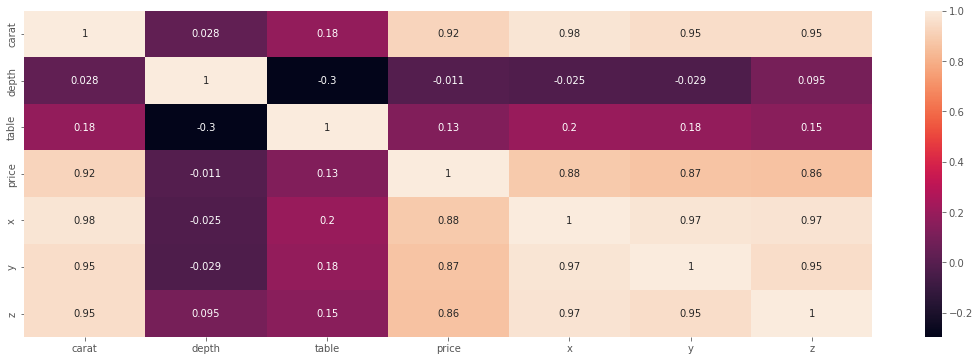

In [53]:
plt.figure(figsize=(19,6))
sns.heatmap(numeric_Df.corr(),annot=True)

Similarly we can visualize the scatterplot and correlation in the graph below

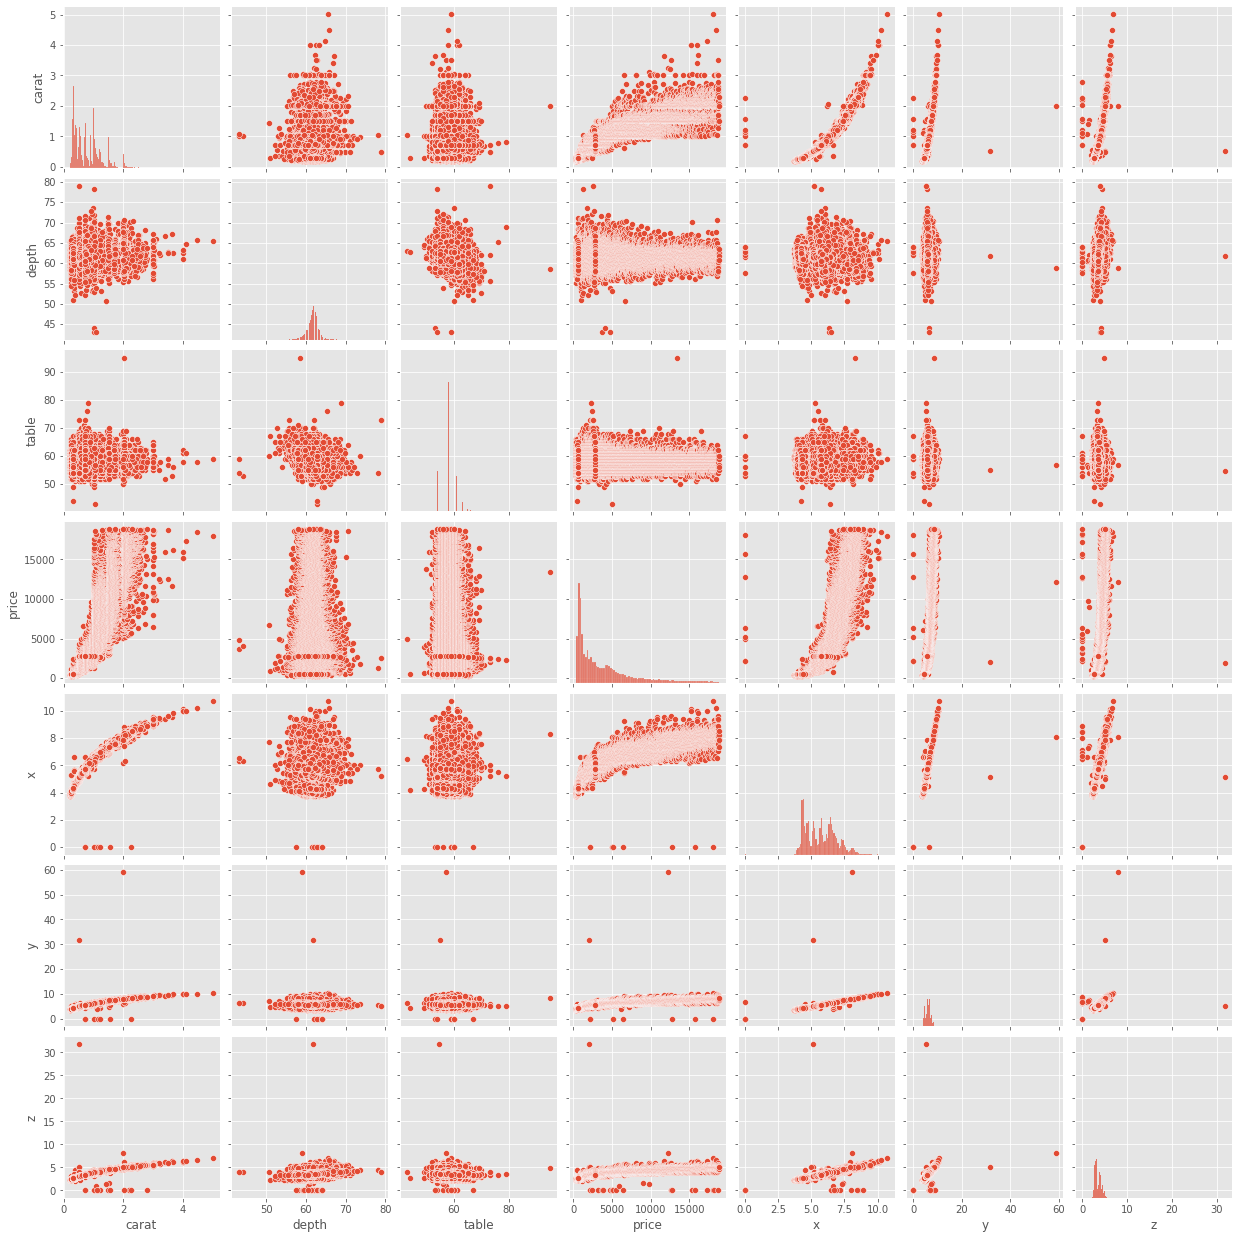

In [54]:
sns.pairplot(numeric_Df)

### Making the Categorical Data to numeric, So that we can train the model with all the possible features

In [55]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [56]:
df['cut']= df['cut'].replace(df['cut'].unique(), np.arange(1,len(df['cut'].unique())+1)) 
df['color']= df['color'].replace(df['color'].unique(), np.arange(1,len(df['color'].unique())+1)) 
df['clarity']= df['clarity'].replace(df['clarity'].unique(), np.arange(1,len(df['clarity'].unique())+1))

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53943 entries, 1 to 53943
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  int32  
 2   color    53943 non-null  int32  
 3   clarity  53943 non-null  int32  
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.9 MB


* Now Let's plot the correlation again to see the relations between the new numeric columns as well

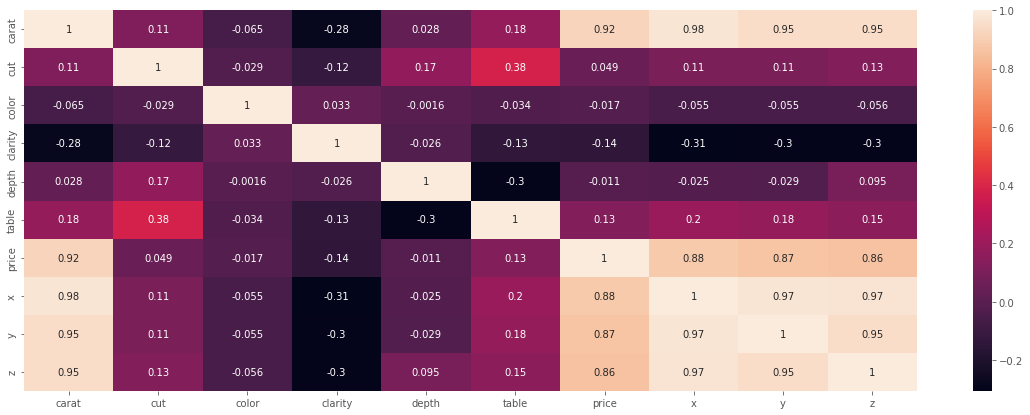

In [58]:
numeric_Df= df.copy()
plt.figure(figsize=(20,7))
sns.heatmap(numeric_Df.corr(),annot=True)
plt.show()

## Building the multiLinear Regression Model (to predict the prices)

In [59]:
data= numeric_Df.copy()
data

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,1,1,1,61.5,55.0,326,3.95,3.98,2.43
2,0.21,2,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
4,0.29,2,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,3,3,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,2,4,1,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,1,7,1,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,2,1,2,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,2,5,2,59.8,62.0,2756,5.74,5.73,3.43


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [61]:
x= data.drop(columns=['price'])
y=data['price']
x,y

(       carat  cut  color  clarity  depth  table     x     y     z
 1       0.23    1      1        1   61.5   55.0  3.95  3.98  2.43
 2       0.21    2      1        2   59.8   61.0  3.89  3.84  2.31
 3       0.23    3      1        3   56.9   65.0  4.05  4.07  2.31
 4       0.29    2      2        4   62.4   58.0  4.20  4.23  2.63
 5       0.31    3      3        1   63.3   58.0  4.34  4.35  2.75
 ...      ...  ...    ...      ...    ...    ...   ...   ...   ...
 53939   0.86    2      4        1   61.0   58.0  6.15  6.12  3.74
 53940   0.75    1      7        1   62.2   55.0  5.83  5.87  3.64
 53941   0.71    2      1        2   60.5   55.0  5.79  5.74  3.49
 53942   0.71    2      5        2   59.8   62.0  5.74  5.73  3.43
 53943   0.70    4      1        4   60.5   59.0  5.71  5.76  3.47
 
 [53943 rows x 9 columns],
 1         326
 2         326
 3         327
 4         334
 5         335
          ... 
 53939    2757
 53940    2757
 53941    2756
 53942    2756
 53943    2757
 N

In [62]:
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.20, random_state=45)

* Now Standardizing the data of X_train and X_test.

In [63]:
scaler= StandardScaler()
X_train_linearReg= scaler.fit_transform(X_train)
X_test_linearReg= scaler.transform(X_test)

Now making the multi-linear regression model

In [64]:
from sklearn.linear_model import LinearRegression

regression= LinearRegression()
regression.fit(X_train_linearReg, y_train)

LinearRegression()

In [65]:
# printing the feature coefficient and intercept
print("coeff: ",regression.coef_.tolist())
print("Intercept: ", regression.intercept_)

coeff:  [4886.376255533397, -102.4117618676703, 179.04756231044055, 445.9192221783575, -224.50860184848108, -137.9278340463768, -1171.2322430532383, 69.48012190999214, 40.08820499418249]
Intercept:  3932.026602400704


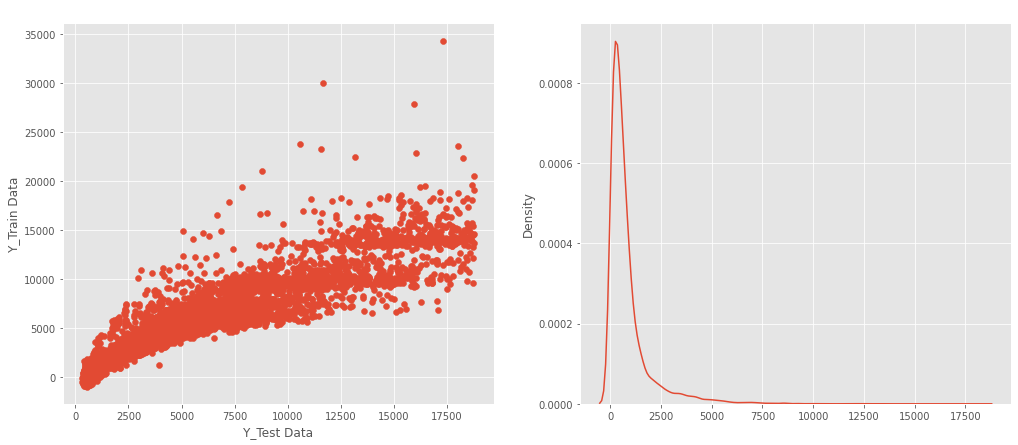

In [66]:
# plotting the linear regression model

y_pred= regression.predict(X_test_linearReg)
plt.figure(figsize=(17,7))

plt.subplot(1,2,1)
plt.scatter(y_test,y_pred)
plt.xlabel('Y_Test Data')
plt.ylabel("Y_Train Data")
plt.title("Multi-linear Regression Model result")

plt.subplot(1,2,2)
a= np.array(y_test)
b= np.array(regression.predict(X_test_linearReg))
sns.kdeplot(x=abs(a-b))
plt.title("Margin of error range in the model")

plt.show()

we can see our multi-linear model is perfoming okay, but still we can improve the model

* Checking the Model's Accuracy

In [67]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)

print("R-squared score: ", r2)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

R-squared score:  0.8775884261948395
Mean Squared Error:  1970184.0545696502
Mean Absolute Error:  841.6718378455529


We can see our model's accuracy is about `87.75%` with a high `mean squared error = 1970184.054`, and `mean absolute error = 841.671`

Lets see if we can improve our accuracy by removing overfitting with the help of Ridge Regression, also with the help of Lasso Regression (Feature selection), and ElasticNet Regression models.


## Lasso Regression

In [68]:
from sklearn.linear_model import Lasso

lassoReg= Lasso()
lassoReg.fit(X_train_linearReg, y_train)
# printing the feature coefficient and intercept
print("coeff: ",lassoReg.coef_.tolist())
print("Intercept: ", lassoReg.intercept_)

coeff:  [4842.557785306317, -101.62028131379417, 177.5433683280467, 446.35888032313505, -216.79552719253468, -137.14124202389843, -1066.1770598105588, 43.30561606662888, 2.9154518654741257]
Intercept:  3932.026602400704


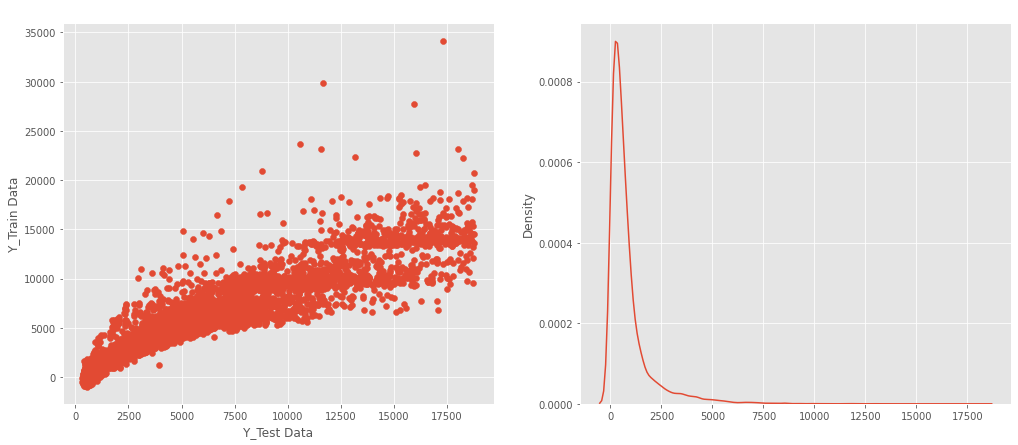

In [69]:
# plotting the regression model

y_pred= lassoReg.predict(X_test_linearReg)
plt.figure(figsize=(17,7))

plt.subplot(1,2,1)
plt.scatter(y_test,y_pred)
plt.xlabel('Y_Test Data')
plt.ylabel("Y_Train Data")
plt.title("Ridge Regression (Overfitting reduction) Model result")

plt.subplot(1,2,2)
a= np.array(y_test)
b= np.array(lassoReg.predict(X_test_linearReg))
sns.kdeplot(x=abs(a-b))
plt.title("Margin of error range in the model")

plt.show()

In [70]:
# Checking Accuracy of Lasso model

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)

print("R-squared score: ", r2)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

R-squared score:  0.8775306048563449
Mean Squared Error:  1971114.6747354947
Mean Absolute Error:  843.2377017256056


## Ridge Regresssion

In [78]:
from sklearn.linear_model import Ridge

ridgeReg= Ridge()
ridgeReg.fit(X_train_linearReg, y_train)
# printing the feature coefficient and intercept
print("coeff: ",ridgeReg.coef_.tolist())
print("Intercept: ", ridgeReg.intercept_)

coeff:  [4883.3225257358645, -102.40474619575956, 179.00846658988746, 445.98620324479646, -224.28138433609863, -137.90762385598705, -1167.4463307419114, 69.17546468186477, 39.60656546364991]
Intercept:  3932.026602400704


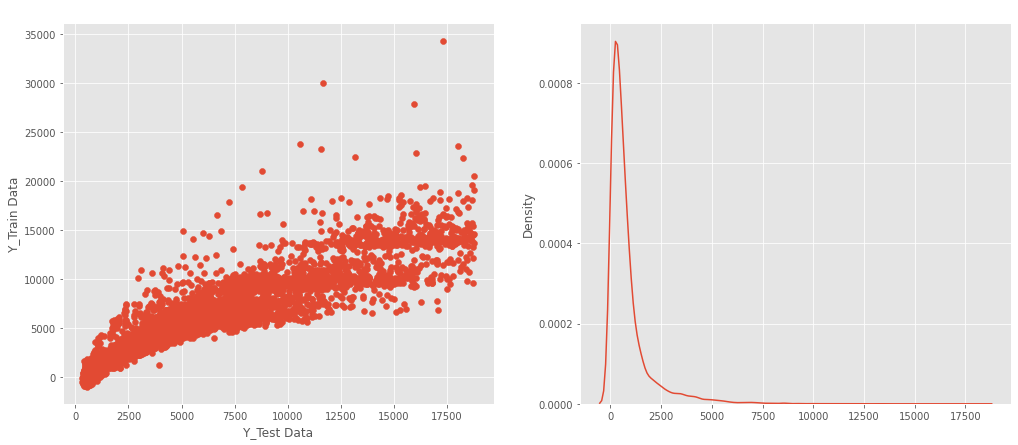

In [73]:
# plotting the regression model

y_pred= ridgeReg.predict(X_test_linearReg)
plt.figure(figsize=(17,7))

plt.subplot(1,2,1)
plt.scatter(y_test,y_pred)
plt.xlabel('Y_Test Data')
plt.ylabel("Y_Train Data")
plt.title("Ridge Regression (Overfitting reduction) Model result")

plt.subplot(1,2,2)
a= np.array(y_test)
b= np.array(ridgeReg.predict(X_test_linearReg))
sns.kdeplot(x=abs(a-b))
plt.title("Margin of error range in the model")

plt.show()

In [74]:
# Checking Accuracy of Ridge model

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)

print("R-squared score: ", r2)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

R-squared score:  0.8775861090594905
Mean Squared Error:  1970221.3482909442
Mean Absolute Error:  841.8000451121854


## ElasticNet Model

In [75]:
from sklearn.linear_model import ElasticNet

elastic= ElasticNet()
elastic.fit(X_train_linearReg, y_train)

# printing the feature coefficient and intercept
print("coeff: ",ridgeReg.coef_.tolist())
print("Intercept: ", ridgeReg.intercept_)

coeff:  [4883.3225257358645, -102.40474619575956, 179.00846658988746, 445.98620324479646, -224.28138433609863, -137.90762385598705, -1167.4463307419114, 69.17546468186477, 39.60656546364991]
Intercept:  3932.026602400704


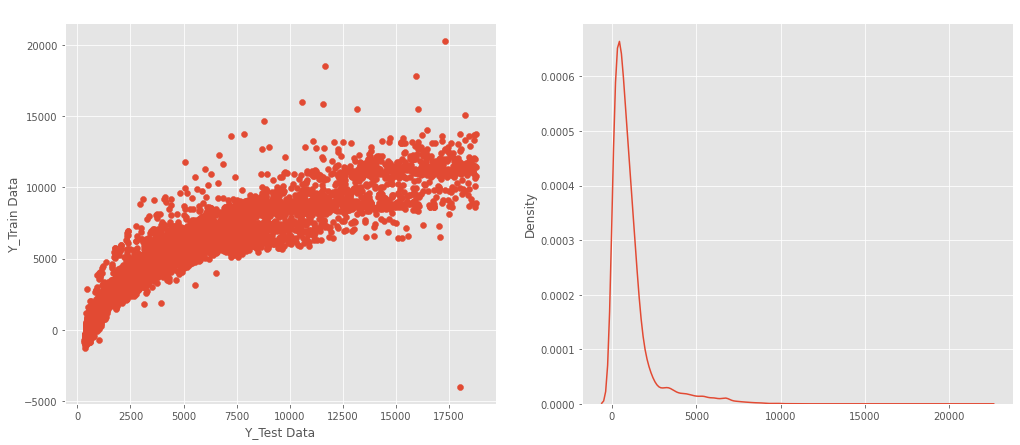

In [76]:
# plotting the linear regression model

y_pred= elastic.predict(X_test_linearReg)
plt.figure(figsize=(17,7))

plt.subplot(1,2,1)
plt.scatter(y_test,y_pred)
plt.xlabel('Y_Test Data')
plt.ylabel("Y_Train Data")
plt.title("Ridge Regression (Overfitting reduction) Model result")

plt.subplot(1,2,2)
a= np.array(y_test)
b= np.array(elastic.predict(X_test_linearReg))
sns.kdeplot(x=abs(a-b))
plt.title("Margin of error range in the model")

plt.show()

In [77]:
# Checking Accuracy of Ridge model

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)

print("R-squared score: ", r2)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

R-squared score:  0.8187912896964616
Mean Squared Error:  2916509.4483419806
Mean Absolute Error:  1104.6335932923464


Thus, after cheking the all linear model's accuracy I can say that our normal Multi-linear model is perfomring the best as Ridge and Lasso regression had not much affect on the model, however, elasticnet model just decreased the accuracy. Therefore, our normal Model is better in this situation

Will perform the polynomial Regression in the next file, so that we can see if that model gives us much more accuracy.